In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 8 ##

## Categorical Distribution ##

In [2]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


**Activity:** How many movies were released by MGM? What about Disney? What about Fox?

In [ ]:
num_MGM = ...
num_MGM

In [ ]:
num_Disney = ...
num_Disney

In [ ]:
num_Fox = ...
num_Fox

Let's explore another way to do this.

In [5]:
studio_distribution = studios.group('Studio')
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [6]:
sum(studio_distribution.column('count'))

200

## Bar Charts ##

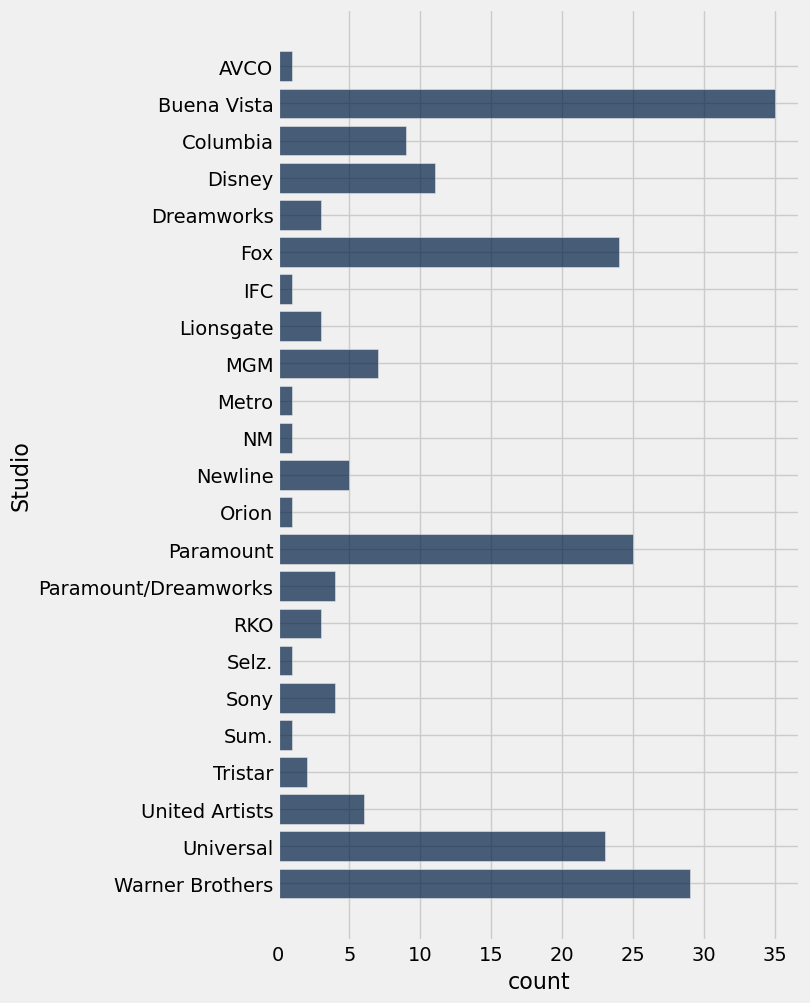

In [7]:
studio_distribution.barh('Studio')

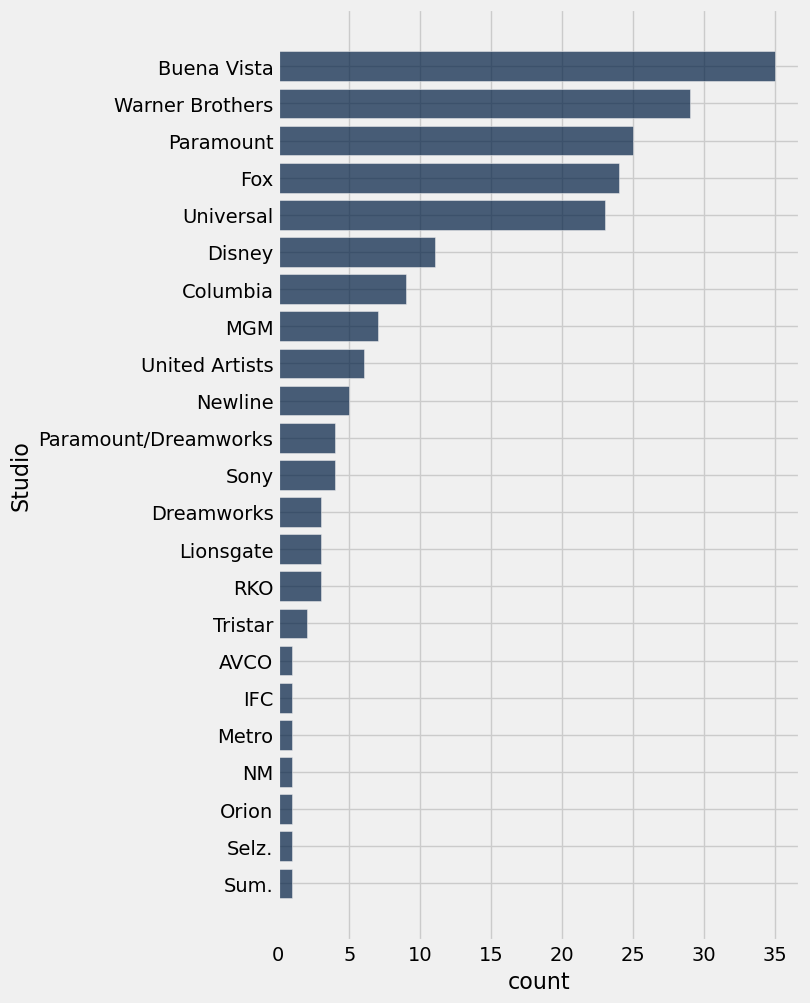

In [8]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [12]:
ages = 2023 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,84
Star Wars,Fox,460998007,1583483200,1977,46
The Sound of Music,Fox,158671368,1266072700,1965,58
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,41
Titanic,Paramount,658672302,1204368000,1997,26
The Ten Commandments,Paramount,65500000,1164590000,1956,67
Jaws,Universal,260000000,1138620700,1975,48
Doctor Zhivago,MGM,111721910,1103564200,1965,58
The Exorcist,Warner Brothers,232906145,983226600,1973,50
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,86


In [11]:
top_movies.num_rows

200

In [13]:
min(ages), max(ages)

(6, 102)

In [76]:
equal_bins = top_movies.bin('Age', bins = np.arange(0, 121, 10))
equal_bins.show()

bin,Age count
0,21
10,35
20,37
30,29
40,26
50,22
60,15
70,8
80,6
90,0


In [77]:
sum(equal_bins.column('Age count'))

200

In [116]:
my_bins = make_array(0, 10, 20, 25, 40, 57, 102)

In [117]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,21
10,35
20,23
25,43
40,42
57,36
102,0


In [118]:
sum(binned_data.column('Age count'))

200

**Activity** How many movies in `top_movies` have an age between 65 and 102 (excluding 102)? Does anything seem strange to you?

## Histograms ##

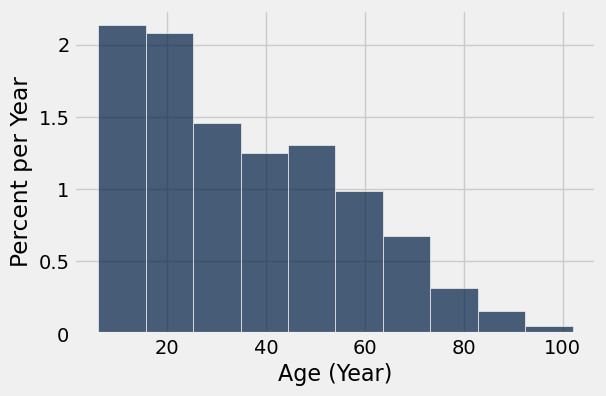

In [73]:
# Let's explore the hist function!
top_movies.hist('Age', unit='Year')

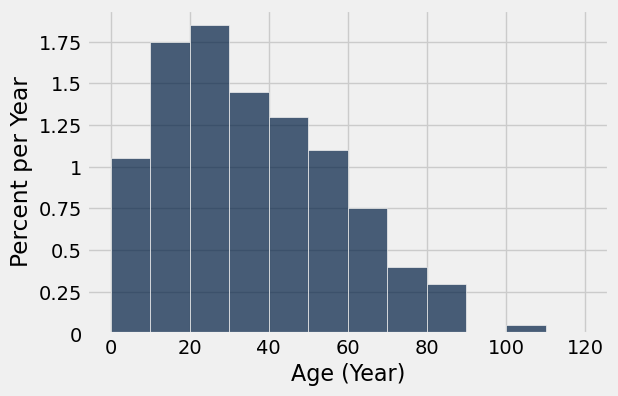

In [74]:
# Let's try equally spaced bins
top_movies.hist('Age', bins = np.arange(0, 121, 10), unit = 'Year')

In [75]:
1.75 * (20 - 10)

17.5

In [78]:
equal_bins

bin,Age count
0,21
10,35
20,37
30,29
40,26
50,22
60,15
70,8
80,6
90,0


In [82]:
total_count = sum(equal_bins.column('Age count'))
35/total_count

0.17499999999999999

## The vertical axis

In [119]:
my_bins

array([  0,  10,  20,  25,  40,  57, 102])

In [120]:
binned_data

bin,Age count
0,21
10,35
20,23
25,43
40,42
57,36
102,0


In [121]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)
binned_data

bin,Age count,Percent
0,21,10.5
10,35,17.5
20,23,11.5
25,43,21.5
40,42,21
57,36,18
102,0,0


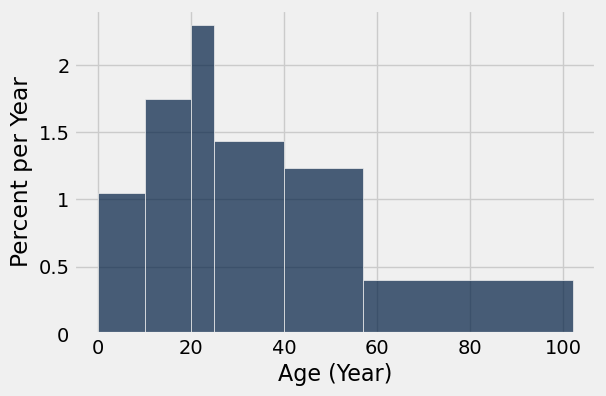

In [122]:
# Let's make our first histogram!
top_movies.hist('Age', bins = my_bins, unit = 'Year')

## Height ##

### Question: What is the height of the [40, 65] bin?

In [ ]:
top_movies.hist('Age', bins=my_bins, unit='Year')

In [ ]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)

In [ ]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [ ]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

### What are the heights of the rest of the bins?

In [ ]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [ ]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [ ]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [ ]:
bin_lefts

In [ ]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')